<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import wget
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'
wget.download(url)

'loan_train (1).csv'

### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


### Convert to date time object


In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [5]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

## Convert Categorical features to numerical values


In [6]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

## One Hot Encoding

#### How about education?


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [7]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [8]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [9]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [10]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [11]:
# import required packages

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [12]:
# Build train/test sets. Use 25% of data for testing.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print("Training data shape: ",X_train.shape, y_train.shape)
print("Test data shape: " , X_test.shape, y_test.shape)

Training data shape:  (259, 8) (259,)
Test data shape:  (87, 8) (87,)


In [13]:
# Test number of neighbors (K) from 1 to 20
n_K = 20
mean_acc = np.zeros((n_K-1))
std_acc = np.zeros((n_K-1))

# For each value of K, run the model and output the accuracy
for n in range(1,n_K):
    
    nb = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = nb.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)  
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.70114943, 0.63218391, 0.75862069, 0.75862069, 0.77011494,
       0.77011494, 0.79310345, 0.77011494, 0.77011494, 0.74712644,
       0.72413793, 0.72413793, 0.72413793, 0.74712644, 0.73563218,
       0.73563218, 0.72413793, 0.70114943, 0.72413793])

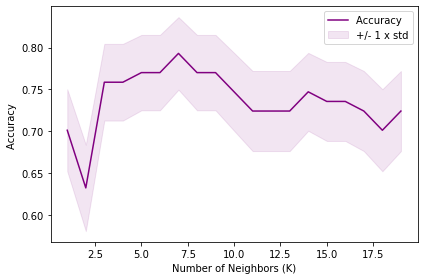

In [14]:
# Plot the accuracies to easily visualize the best value of K

plt.plot(range(1,n_K),mean_acc, color='purple')
plt.fill_between(range(1,n_K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10, color="purple")
plt.legend(('Accuracy ', '+/- 1 x std','+/- 3 x std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [15]:
# Get K with max accuracy
max_acc = mean_acc.max()
K_max_acc = mean_acc.argmax()+1 
print("Max accuracy: ", max_acc, " for K = ", K_max_acc)

Max accuracy:  0.7931034482758621  for K =  7


In [16]:
# Now build model with full dataset using best K identified above

Knn_model = KNeighborsClassifier(n_neighbors = K_max_acc).fit(X,y)

# Decision Tree


In [17]:
from sklearn.tree import DecisionTreeClassifier
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [18]:
# Create Decision Tree Model.

dt = DecisionTreeClassifier(criterion="entropy", max_depth =6)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

# Compare predicted values with actual test values
#print("Predicted values: ",dt_pred[0:30])
#print("Actual values: ",y_test[0:30])

# Print accuracy of Decision Tree Classification
print("Decision Tree Accuracy: ", metrics.accuracy_score(y_test, dt_pred))

Decision Tree Accuracy:  0.7471264367816092


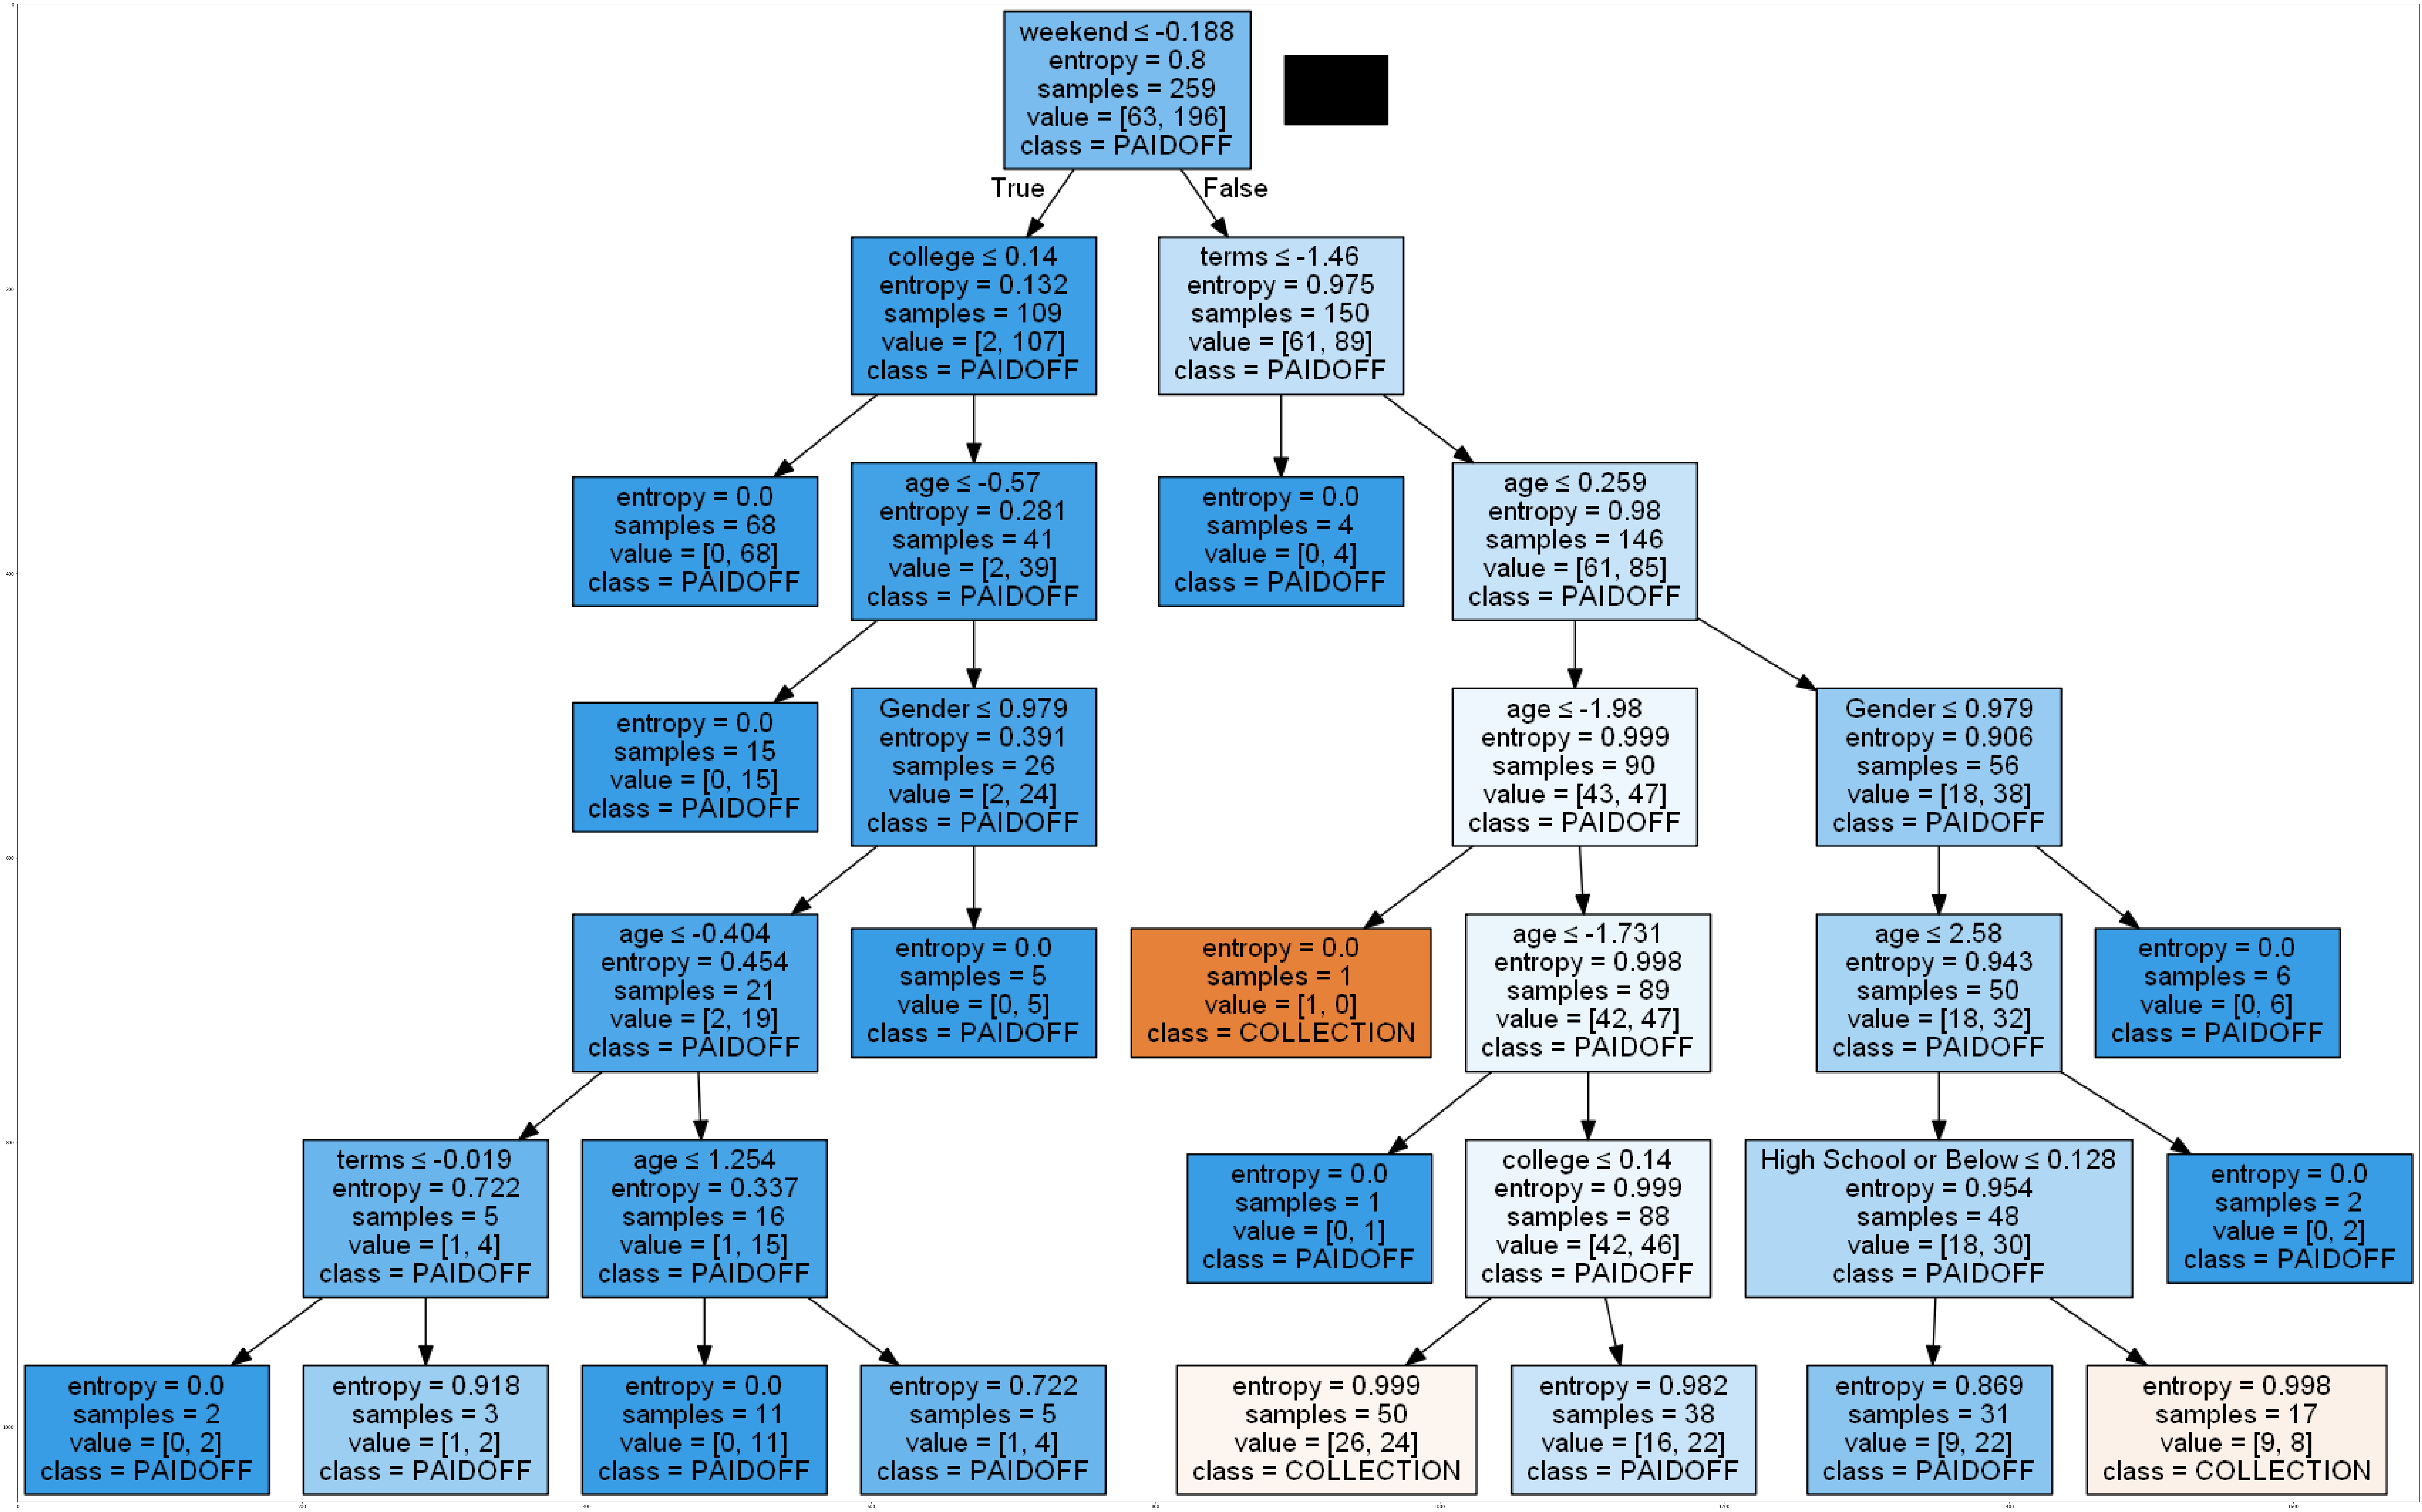

In [19]:
# Create visual of Decision Tree

dot_data = StringIO()
filename = "loan_decision_tree.png"
featureNames = Feature.columns[0:8]
out=tree.export_graphviz(dt,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [20]:
# Now create final, full Decision Tree Model using entire training dataset. In testing, above, max_depth of 6 gave best accuracy

DTree_model = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DTree_model.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

# Support Vector Machine


In [21]:
import pylab as pl
import scipy.optimize as opt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm

In [23]:
# Different kernels tested, poly was best
sv = svm.SVC(kernel='poly')
sv.fit(X_train, y_train) 
y_pred = sv.predict(X_test)
    
c_matrix = confusion_matrix(y_test, y_pred, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

  COLLECTION       0.67      0.09      0.15        23
     PAIDOFF       0.75      0.98      0.85        64

    accuracy                           0.75        87
   macro avg       0.71      0.54      0.50        87
weighted avg       0.73      0.75      0.67        87



Confusion matrix, without normalization


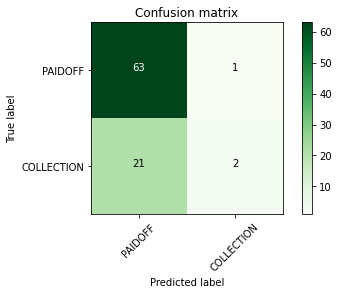

In [24]:
# Create visual of confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [25]:
# Create final SVM model using best parameters determined from testing (above)

SVM_model = svm.SVC(kernel='poly')
SVM_model.fit(X, y) 

SVC(kernel='poly')

# Logistic Regression


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
#test solvers ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)
y_pred_prob = LR.predict_proba(X_test)

Confusion matrix, without normalization


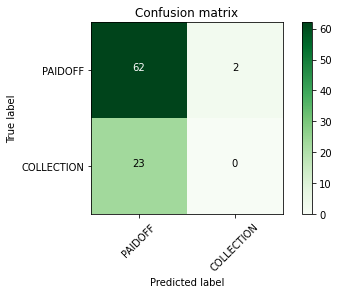

In [28]:
# Compute confusion matrix
c_matrix = confusion_matrix(y_test, y_pred, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(c_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [29]:
# Now create final model using full train dataset

LR_model = LogisticRegression(C=0.01,solver='liblinear').fit(X,y)

# Model Evaluation using Test set


In [30]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [ ]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'
wget.download(url)

### Load Test set for evaluation


In [31]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [32]:
test_df.shape

(54, 10)

In [33]:
# Clean/process test dataset the same as the training dataset

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [34]:
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)

Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [35]:
X_test = Feature_test
y_test = test_df['loan_status'].values

X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

# create dataframe to store each model's accuracy scores

df_scores = pd.DataFrame(columns = ["Model","Jaccard","F1","LogLoss"])
df_scores

,Model,Jaccard,F1,LogLoss


In [36]:
# K Nearest Neighbours Prediction

y_pred_knn = Knn_model.predict(X_test)
print("KNN global accuracy: ", metrics.accuracy_score(y_test, y_pred_knn))
knn_f1_dict = classification_report(y_test, y_pred_knn, output_dict=True)
knn_f1 = knn_f1_dict["weighted avg"]["f1-score"]
knn_j = jaccard_score(y_test, y_pred_knn,pos_label="PAIDOFF")

# Append Knn model scores to dataframe
knn_scores = {'Model':'K Nearest Neighbors','Jaccard':knn_j,'F1':knn_f1}
df_scores = df_scores.append(knn_scores,ignore_index=True)
df_scores

KNN global accuracy:  0.7407407407407407


,Model,Jaccard,F1,LogLoss
0,K Nearest Neighbors,0.72,0.714431,NaN


In [37]:
# Decision Tree Prediction

y_pred_dt = DTree_model.predict(X_test)
print("Decision Tree Accuracy: ",metrics.accuracy_score(y_test, y_pred_dt))
dt_f1_dict = classification_report(y_test, y_pred_dt,output_dict=True)
dt_f1 = dt_f1_dict["weighted avg"]["f1-score"]
dt_j = jaccard_score(y_test, y_pred_dt,pos_label="PAIDOFF")

# Append Decision Tree model scores to dataframe
dt_scores = {'Model':'Decision Tree','Jaccard':dt_j,'F1':dt_f1}
df_scores = df_scores.append(dt_scores,ignore_index=True)
df_scores

Decision Tree Accuracy:  0.7407407407407407


,Model,Jaccard,F1,LogLoss
0,K Nearest Neighbors,0.72000,0.714431,NaN
1,Decision Tree,0.72549,0.700673,NaN


In [38]:
# Support Vector Machine Prediction

y_pred_svm = SVM_model.predict(X_test)
print("SVM Accuracy: ",metrics.accuracy_score(y_test, y_pred_svm))
svm_f1_dict = classification_report(y_test, y_pred_svm, output_dict=True)
svm_f1 = svm_f1_dict["weighted avg"]["f1-score"]
svm_j = jaccard_score(y_test, y_pred_svm,pos_label="PAIDOFF")

# Append Support Vector Machine model scores to dataframe
svm_scores = {'Model':'Support Vector Machine','Jaccard':svm_j,'F1':svm_f1}
df_scores = df_scores.append(svm_scores,ignore_index=True)
df_scores


SVM Accuracy:  0.7407407407407407


,Model,Jaccard,F1,LogLoss
0,K Nearest Neighbors,0.720000,0.714431,NaN
1,Decision Tree,0.725490,0.700673,NaN
2,Support Vector Machine,0.730769,0.683128,NaN


In [41]:
# Logistic Regression Prediction

y_pred_LR = LR_model.predict(X_test)
y_pred_prob_LR = LR_model.predict_proba(X_test)

lr_f1_dict = classification_report(y_test, y_pred_LR, output_dict=True, zero_division=0)
lr_f1 = lr_f1_dict["weighted avg"]["f1-score"]
lr_j = jaccard_score(y_test, y_pred_LR,pos_label="PAIDOFF")
lr_ll = log_loss(y_test,y_pred_prob_LR)

# Append Logistic Regression model scores to dataframe
lr_scores = {'Model':'Logistic Regression','Jaccard':svm_j,'F1':svm_f1,'LogLoss':lr_ll}
df_scores = df_scores.append(lr_scores,ignore_index=True)
df_scores

,Model,Jaccard,F1,LogLoss
0,K Nearest Neighbors,0.720000,0.714431,NaN
1,Decision Tree,0.725490,0.700673,NaN
2,Support Vector Machine,0.730769,0.683128,NaN
3,Logistic Regression,0.730769,0.683128,0.556608
4,Logistic Regression,0.730769,0.683128,0.556608
5,Logistic Regression,0.730769,0.683128,0.556608


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
